In [78]:
import pandas as pd
import numpy as np

# Reading Data 

In [79]:
train = pd.read_csv("Assignment2_train.csv")
test = pd.read_csv("Assignment2_test.csv")

In [80]:
train.head()

,index,age,race,sex,education,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,y
0,1,26,White,Male,Some-college,a_2,b_4,c_0,d_39,e_4,53833,10,0,0,42,0
1,2,35,White,Male,Some-college,a_2,b_3,c_0,d_39,e_4,67728,10,0,2051,45,0
2,3,61,White,Male,HS-grad,a_2,b_12,c_0,d_39,e_6,268831,9,0,0,53,0
3,4,48,Asian-Pac-Islander,Female,Bachelors,a_5,b_1,c_4,d_30,e_4,238360,13,0,0,40,0
4,5,20,White,Male,Some-college,a_4,b_6,c_3,d_39,e_4,199011,10,0,0,12,0


In [81]:
# drop index column 
train = train.drop(columns=["index"])

In [82]:
train.head()

,age,race,sex,education,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,y
0,26,White,Male,Some-college,a_2,b_4,c_0,d_39,e_4,53833,10,0,0,42,0
1,35,White,Male,Some-college,a_2,b_3,c_0,d_39,e_4,67728,10,0,2051,45,0
2,61,White,Male,HS-grad,a_2,b_12,c_0,d_39,e_6,268831,9,0,0,53,0
3,48,Asian-Pac-Islander,Female,Bachelors,a_5,b_1,c_4,d_30,e_4,238360,13,0,0,40,0
4,20,White,Male,Some-college,a_4,b_6,c_3,d_39,e_4,199011,10,0,0,12,0


Import Label Encoder - To turn categorical variables into numericals

In [83]:
from sklearn import preprocessing

In [84]:
label_encoder = preprocessing.LabelEncoder()

In [85]:
cat_cols = ['race','sex','education','f1','f2','f3','f4','f5']
train[cat_cols] = train[cat_cols].apply(label_encoder.fit_transform)


In [86]:
train.head()

,age,race,sex,education,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,y
0,26,4,1,15,2,9,0,32,4,53833,10,0,0,42,0
1,35,4,1,15,2,8,0,32,4,67728,10,0,2051,45,0
2,61,4,1,11,2,4,0,32,6,268831,9,0,0,53,0
3,48,1,0,9,5,1,4,23,4,238360,13,0,0,40,0
4,20,4,1,15,4,11,3,32,4,199011,10,0,0,12,0


In [87]:
# target data 
y = train['y']

# features 
x = train.iloc[:,:-1]



In [88]:
# check for null values 
x.isnull().sum()
# do not have missing values 

age          0
race         0
sex          0
education    0
f1           0
f2           0
f3           0
f4           0
f5           0
f6           0
f7           0
f8           0
f9           0
f10          0
dtype: int64

In [89]:
from sklearn.model_selection import train_test_split
# split dataset into training set and validation set
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=23)

In [90]:
from sklearn import metrics
from sklearn.metrics import classification_report


In [91]:
# function to print out model's classification results 
def get_model_results(classifier, model, x_train, y_train, x_test, y_test):
    # fit the model with data 
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("Results for "+ classifier)
    print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
    print("Recall:", metrics.recall_score(y_test,y_pred))
    print("Precision:", metrics.precision_score(y_test,y_pred))
    print("F1 Score:", metrics.f1_score(y_test,y_pred))

    # confusion matrix 
    cfn_matrix = metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
    print("\nConfusion Matrix:\n")
    print(cfn_matrix)

    # Classification Report 
    print("\nClassification Report:\n")

    print(classification_report(y_test, y_pred))
    
    accuracy = metrics.accuracy_score(y_test,y_pred)
    recall = metrics.recall_score(y_test,y_pred)
    precision = metrics.precision_score(y_test,y_pred)
    f1 = metrics.f1_score(y_test,y_pred)
    results = [accuracy, recall, precision, f1]
    return results



# Logistic Regression 

In [92]:

from sklearn.linear_model import LogisticRegression


In [93]:
# instantiate log reg model
log_model = LogisticRegression(random_state=101)

In [94]:

log_results = get_model_results("Logistic Regression", log_model, x_train, y_train, x_val, y_val )


Results for Logistic Regression
Accuracy: 0.7920692684151085
Recall: 0.3037974683544304
Precision: 0.6308871851040526
F1 Score: 0.41011035955856184

Confusion Matrix:

[[ 576 1320]
 [ 337 5736]]

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      6073
           1       0.63      0.30      0.41      1896

    accuracy                           0.79      7969
   macro avg       0.72      0.62      0.64      7969
weighted avg       0.77      0.79      0.76      7969



In [95]:
log_results

[0.7920692684151085,
 0.3037974683544304,
 0.6308871851040526,
 0.41011035955856184]

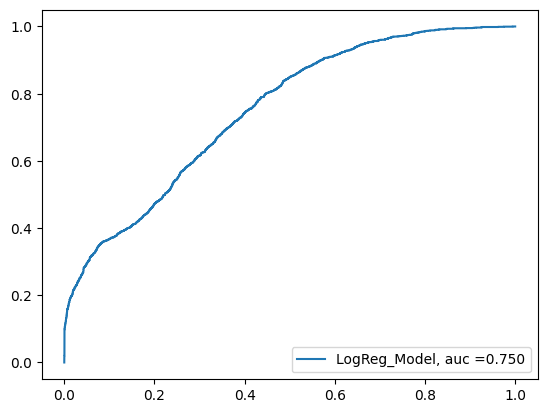

In [96]:
#plot roc curve 
import matplotlib.pyplot as plt 
# predicted probabilities of class 1 
y_pred_prob_logmodel = log_model.predict_proba(x_val)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_val, y_pred_prob_logmodel)
auc = metrics.roc_auc_score(y_val, y_pred_prob_logmodel)
plt.plot(fpr,tpr,label="LogReg_Model, auc ="+str("{:.3f}".format(auc)))
plt.legend(loc=4)
plt.show()



In [97]:
num_0 = (train['y'] == 0).sum()
num_1 = (train['y'] == 1).sum() 
total = num_0 + num_1

print("Number of Y Outcome = 0:" , num_0)
print("Number of Y Outcome = 1:", num_1)

print("Percentage of Y Outcome = 0:" , num_0/total * 100, "%")
print("Percentage of Y Outcome = 1:", num_1/total * 100, "%")


Number of Y Outcome = 0: 20194
Number of Y Outcome = 1: 6367
Percentage of Y Outcome = 0: 76.0287639772599 %
Percentage of Y Outcome = 1: 23.971236022740108 %


As seen above, the dataset is not balanced, where the number of Y variables = 0 makes up 76% of the total outcome variables, while that for Y is only 24%. Thus, there is a bias towards the outcome variable 0. Thus, it is essential to balance the dataset to make training the model easier as it helps prevent bias towards a particular outcome variable. 

Balancing the data

In [98]:
# group by the y variable 
group_y = train.groupby('y')
print(group_y)
bal_data = group_y.apply(lambda x:x.sample(group_y.size().min()).reset_index(drop=True))
bx_train, bx_val, by_train, by_val = train_test_split(bal_data.iloc[:,:-1],bal_data['y'], test_size=0.3, random_state=23)

In [99]:
log_balanced = get_model_results("Logistic Regression (Balanced)", log_model, bx_train,by_train,bx_val,by_val  )


Results for Logistic Regression (Balanced)
Accuracy: 0.7110704004187386
Recall: 0.6617336152219874
Precision: 0.7296037296037297
F1 Score: 0.6940133037694014

Confusion Matrix:

[[1252  640]
 [ 464 1465]]

Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      1929
           1       0.73      0.66      0.69      1892

    accuracy                           0.71      3821
   macro avg       0.71      0.71      0.71      3821
weighted avg       0.71      0.71      0.71      3821



/Users/admin/opt/anaconda3/envs/ipykernel_py3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [100]:
log_balanced

[0.7110704004187386,
 0.6617336152219874,
 0.7296037296037297,
 0.6940133037694014]

In [101]:
# compare between balanced and unbalanced 
bal_unbal = pd.DataFrame()
bal_unbal['Before Balance'] = log_results
bal_unbal['After Balance'] = log_balanced
bal_unbal.rename(index={0: "Accuracy", 1: "Recall", 2: "Precision", 3: "F1 Score"})

,Before Balance,After Balance
Accuracy,0.792069,0.711070
Recall,0.303797,0.661734
Precision,0.630887,0.729604
F1 Score,0.410110,0.694013


As seen, after balancing the data for the Log Regression Model, the recall and the f1 score increased dramatically. 
Balancing the dataset is thus important in order to achieve better overall outcomes.
From now on, we will work with the balanced train and validation sets 

Grid Search to get the best parameters 


In [102]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4,4,20),
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter': [90,100]
}

gridCV = GridSearchCV(log_model, param_grid=grid_params, verbose=False)
gridCV.fit(bx_train,by_train)

/Users/admin/opt/anaconda3/envs/ipykernel_py3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/admin/opt/anaconda3/envs/ipykernel_py3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/admin/opt/anaconda3/envs/ipykernel_py3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/admin/opt/anaconda3/envs/ipykernel_py3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/admin/opt/anaconda3/envs/ipykernel_py3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

KeyboardInterrupt: 

In [ ]:
print(gridCV.best_params_)

{'C': 0.23357214690901212, 'max_iter': 90, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
good_log_model = LogisticRegression(C=0.23357214690901212, max_iter = 90, penalty='l1', solver = "liblinear", random_state=101)

In [ ]:
log_tuned = get_model_results("Logistic Regression (HyperTuned)",good_log_model, bx_train,by_train,bx_val,by_val )

Results for Logistic Regression (HyperTuned)
Accuracy: 0.7639361423711071
Recall: 0.7658562367864693
Precision: 0.7594339622641509
F1 Score: 0.7626315789473684

Confusion Matrix:

[[1449  443]
 [ 459 1470]]

Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      1929
           1       0.76      0.77      0.76      1892

    accuracy                           0.76      3821
   macro avg       0.76      0.76      0.76      3821
weighted avg       0.76      0.76      0.76      3821



In [ ]:
log_tuned

[0.7639361423711071,
 0.7658562367864693,
 0.7594339622641509,
 0.7626315789473684]

In [ ]:
log_table = bal_unbal
log_table["HyperTuned"] = log_tuned
log_table.rename(index={0: "Accuracy", 1: "Recall", 2: "Precision", 3: "F1 Score"})

,Before Balance,After Balance,HyperTuned
Accuracy,0.792069,0.667365,0.771264
Recall,0.303797,0.604123,0.775370
Precision,0.630887,0.686486,0.765658
F1 Score,0.410110,0.642676,0.770483


With tuning to the hyperparameters, the overall metrics have improved 

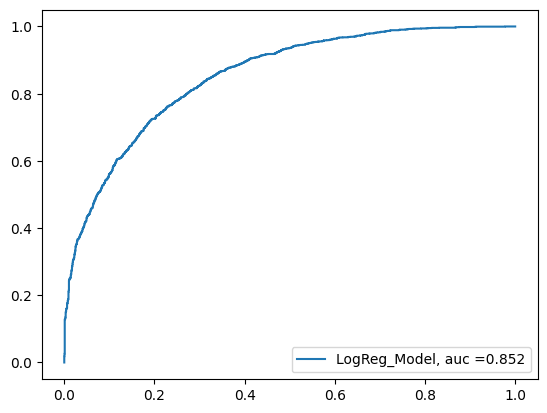

In [ ]:
#plot roc curve 
import matplotlib.pyplot as plt 
# predicted probabilities of class 1 
by_pred_prob_goodlogmodel = good_log_model.predict_proba(bx_val)[:,1]
fpr, tpr, _ = metrics.roc_curve(by_val, by_pred_prob_goodlogmodel)
auc = metrics.roc_auc_score(by_val, by_pred_prob_goodlogmodel)
plt.plot(fpr,tpr,label="LogReg_Model, auc ="+str("{:.3f}".format(auc)))
plt.legend(loc=4)
plt.show()
Log_auc = auc


In [ ]:
Log_auc

0.852226558689722

# Support Vector Machine 

In [ ]:
from sklearn import svm 

In [ ]:

# create svm Classifier with basic linear kernel 
linearSVM = svm.SVC(kernel="linear",probability=True)

In [ ]:
svm_results = get_model_results("Linear SVM", linearSVM, bx_train, by_train, bx_val,by_val, random_state=23)

Results for Linear SVM
Accuracy: 0.7126406699816802
Recall: 0.653276955602537
Precision: 0.7365911799761621
F1 Score: 0.692436974789916

Confusion Matrix:

[[1236  656]
 [ 442 1487]]
Classification Report:


        precision    recall  f1-score   support 
    0       0.69      0.77      0.73      1929 
    1       0.74      0.65      0.69      1892
  accuracy                      0.71      3821 
  macro avg       0.72   0.71   0.71      3821
  weighted avg    0.72   0.71   0.71      3821


In [ ]:
svm_results

[0.7126406699816802, 0.653276955602537, 0.7365911799761621, 0.692436974789916]

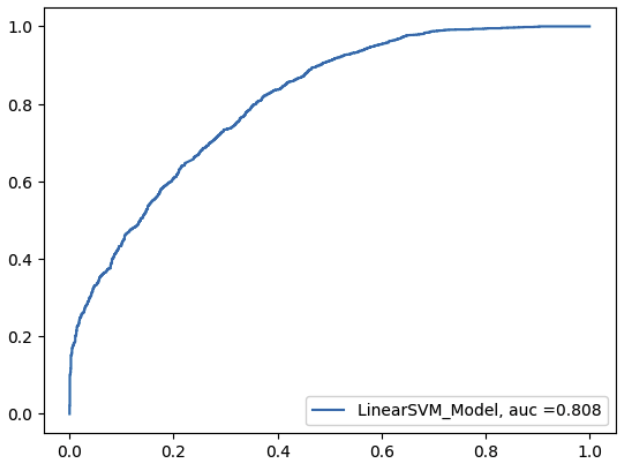

In [ ]:
#plot roc curve 
import matplotlib.pyplot as plt 
# predicted probabilities of class 1 
by_pred_prob_goodlogmodel = linearSVM.predict_proba(bx_val)[:,1]
fpr, tpr, _ = metrics.roc_curve(by_val, by_pred_prob_goodlogmodel)
auc = metrics.roc_auc_score(by_val, by_pred_prob_goodlogmodel)
plt.plot(fpr,tpr,label="LinearSVM_Model, auc ="+str("{:.3f}".format(auc)))
plt.legend(loc=4)
plt.show()
SVM_auc = auc

In [ ]:
SVM_auc 

0.8081356804356788

# AdaBoost

In [ ]:
# import AdaBoost Model 
from sklearn.ensemble import AdaBoostClassifier 

abModel = AdaBoostClassifier(random_state=23)
abModel.fit(bx_train,by_train)
by_pred_abModel = abModel.predict(bx_val)

In [ ]:

ab_results = get_model_results("Ada Boosting", abModel, bx_train,by_train, bx_val, by_val)

Results for Ada Boosting
Accuracy: 0.8262235017011254
Recall: 0.8631078224101479
Precision: 0.8012757605495584
F1 Score: 0.8310432569974555

Confusion Matrix:

[[1633  259]
 [ 405 1524]]

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1929
           1       0.80      0.86      0.83      1892

    accuracy                           0.83      3821
   macro avg       0.83      0.83      0.83      3821
weighted avg       0.83      0.83      0.83      3821



In [ ]:
ab_results

[0.8262235017011254,
 0.8631078224101479,
 0.8012757605495584,
 0.8310432569974555]

In [ ]:
from sklearn.model_selection import GridSearchCV 
grid_params = {
    'n_estimators': [50,100,200,400],
    'algorithm': ['SAMME','SAMME.R'],
    'learning_rate': [0.01,0.05,0.1,0.2],
}

gridCV = GridSearchCV(abModel, param_grid=grid_params, verbose=False)
gridCV.fit(bx_train,by_train)

In [ ]:

print(gridCV.best_params_)


{'n_estimators': 400, 'learning_rate': 0.2, 'algorithm': 'SAMME.R',}


In [ ]:
good_AB = AdaBoostClassifier(n_estimators = 400, learning_rate = 0.2, algorithm = 'SAMME.R', random_state=23)

In [ ]:
ab_tuned = get_model_results("Ada Boost(HyperTuned)", good_AB, bx_train, by_train, bx_val, by_val)

Results for Ada Boost(HyperTuned)
Accuracy: 0.830410887202303
Recall: 0.8641649048625792
Precision: 0.8070088845014808
F1 Score: 0.8346094946401226

Confusion Matrix:

[[1635  257]
 [ 391 1538]]

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1929
           1       0.81      0.86      0.83      1892

    accuracy                           0.83      3821
   macro avg       0.83      0.83      0.83      3821
weighted avg       0.83      0.83      0.83      3821



In [ ]:
ab_tuned

[0.830410887202303, 0.8641649048625792, 0.8070088845014808, 0.8346094946401226]

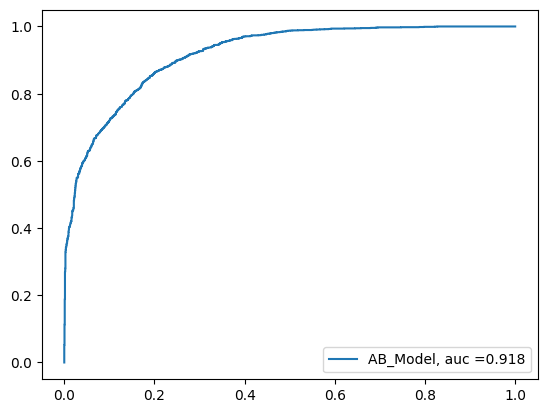

In [ ]:
#plot roc curve 
import matplotlib.pyplot as plt 
# predicted probabilities of class 1 
by_pred_prob_goodAB = good_AB.predict_proba(bx_val)[:,1]
fpr, tpr, _ = metrics.roc_curve(by_val, by_pred_prob_goodAB)
auc = metrics.roc_auc_score(by_val, by_pred_prob_goodAB)
plt.plot(fpr,tpr,label="AB_Model, auc ="+str("{:.3f}".format(auc)))
plt.legend(loc=4)
plt.show()
ab_auc = auc


In [ ]:
ab_auc

0.9181355673995553

# Gradient Boosting

In [ ]:
# import Gradient Boosting Model 
from sklearn.ensemble import GradientBoostingClassifier 

gbModel = GradientBoostingClassifier(random_state=23)
gbModel.fit(bx_train,by_train)
y_pred_gbModel = gbModel.predict(bx_val)


In [ ]:

get_model_results("Gradient Boosting", gbModel, bx_train,by_train, bx_val, by_val)

Results for Gradient Boosting
Accuracy: 0.8275320596702433
Recall: 0.864693446088795
Precision: 0.8023540951446788
F1 Score: 0.8323581785805139

Confusion Matrix:

[[1636  256]
 [ 403 1526]]

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1929
           1       0.80      0.86      0.83      1892

    accuracy                           0.83      3821
   macro avg       0.83      0.83      0.83      3821
weighted avg       0.83      0.83      0.83      3821



[0.8275320596702433, 0.864693446088795, 0.8023540951446788, 0.8323581785805139]

In [ ]:
from sklearn.model_selection import GridSearchCV 
grid_params = {
    'n_estimators': [50,100,200,400],
    'max_depth': [3,4,5,6,7,8],
    'learning_rate': [0.01,0.05,0.1,0.2],
    'max_leaf_nodes': [2,4,6,8]
}

gridCV = GridSearchCV(GradientBoostingClassifier(), param_grid=grid_params, verbose=False)
gridCV.fit(bx_train,by_train)
print(gridCV.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'max_leaf_nodes': 8, 'n_estimators': 200}


In [ ]:
good_GB = GradientBoostingClassifier(learning_rate = 0.1, max_depth= 3, max_leaf_nodes= 8, n_estimators=200)

In [ ]:
grad_tuned = get_model_results("Gradient Boost(HyperTuned)", good_GB, bx_train, by_train, bx_val, by_val)

Results for Gradient Boost(HyperTuned)
Accuracy: 0.8382622350170112
Recall: 0.8736786469344608
Precision: 0.8134842519685039
F1 Score: 0.8425076452599388

Confusion Matrix:

[[1653  239]
 [ 379 1550]]

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1929
           1       0.81      0.87      0.84      1892

    accuracy                           0.84      3821
   macro avg       0.84      0.84      0.84      3821
weighted avg       0.84      0.84      0.84      3821



In [ ]:
grad_tuned

[0.8382622350170112,
 0.8736786469344608,
 0.8134842519685039,
 0.8425076452599388]

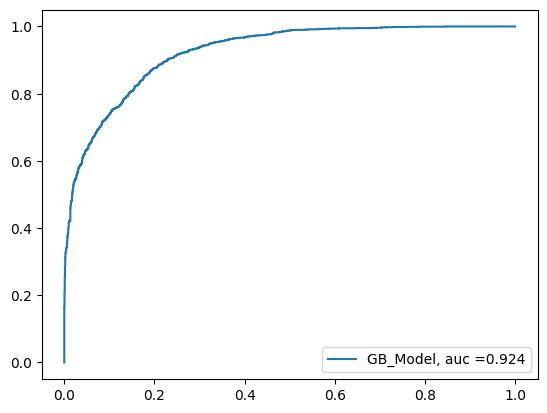

In [ ]:
#plot roc curve 
import matplotlib.pyplot as plt 
# predicted probabilities of class 1 
by_pred_prob_goodGB = good_GB.predict_proba(bx_val)[:,1]
fpr, tpr, _ = metrics.roc_curve(by_val, by_pred_prob_goodGB)
auc = metrics.roc_auc_score(by_val, by_pred_prob_goodGB)
plt.plot(fpr,tpr,label="GB_Model, auc ="+str("{:.3f}".format(auc)))
plt.legend(loc=4)
plt.show()
gb_auc = auc


In [ ]:
gb_auc

0.9237973152626485

Summary to compare the metrics of the 4 different classiifers 

In [ ]:
summary = pd.DataFrame()
log_tuned, svm_results, ab_tuned, grad_tuned 
summary['Logistic Regression (Tuned)'] = log_tuned
summary['Lnear SVM '] = svm_results
summary['Ada Boosting (Tuned)'] = ab_tuned
summary['Gradient Boosting (Tuned)'] = grad_tuned

summary.rename(index={0: "Accuracy", 1: "Recall", 2: "Precision", 3: "F1 Score"})


,Logistic Regression (Tuned),Lnear SVM,Ada Boosting (Tuned),Gradient Boosting (Tuned)
Accuracy,0.763936,0.712641,0.830411,0.838262
Recall,0.765856,0.653277,0.864165,0.873679
Precision,0.759434,0.736591,0.807009,0.813484
F1 Score,0.762632,0.692437,0.834609,0.842508


From this summary table, we can see that Gradient Boosting is the best overall classifier, with all the metrics of accuracy, recall, precision and f1_score being the highest, suggesting that it is the best performing classifier.

These Metrics are chosen because they are important. 
Accuracy refers to the percentage of total items classified correctly- (TP+TN)/(N+P). With the highest accuracy amongst all classifiers, Gradient Boosting have classified the items correctly at the highest rate of 0.84.

Recall refers to the number of items correctly identified as positive out of total true positives- TP/(TP+FN). With the highest recall amongst all classifiers, Gradient Boosting have correctly identified most items as positive out of total true positives correctly at the highest rate of 0.87.

Precision refers to number of items correctly identified as positive out of total items identified as positive- TP/(TP+FP). With the highest precision amongst all classifiers, Gradient Boosting have correctly identified most positive out of total items identified as positive, at the highest rate of 0.81. 

Lastly, Gradient Boosting also have the highest F1 Score which is the harmonic mean of the precision and recall, at a value of 0.84. 

With the highest scores for all of the metrics, it is nonetheless that Gradient Boosting is the best classifier given this data. 

In [ ]:
auc_summary = pd.DataFrame()
auc_summary['Logistic Regression (Tuned)'] = [Log_auc]
auc_summary['Lnear SVM '] = [SVM_auc]
auc_summary['Ada Boosting (Tuned)'] = [ab_auc]
auc_summary['Gradient Boosting (Tuned)'] = [gb_auc]
auc_summary.rename(index={0: "Area Under Curve"})


,Logistic Regression (Tuned),Lnear SVM,Ada Boosting (Tuned),Gradient Boosting (Tuned)
Area Under Curve,0.852227,0.808136,0.918136,0.923797


This can be even more evident by the fact that the Area Under Curve for Gradient Boosting was the highest at 0.92 compared to the other models.
This suggests that the ability of the GB Classifier at distinguishing between the 2 classes is the greatest amongst all the classifiers as well

Therefore, I would be selecting the Gradient Boosting Classifier as the classifier to predict performance on the test data.

Cleaning the Test Data similar to how the Training Data was cleaned so that the model can predict on the test dataset as well.

In [103]:
test = test.drop(columns=["index"])


In [107]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


In [108]:
cat_cols = ['race','sex','education','f1','f2','f3','f4','f5']
test[cat_cols] = test[cat_cols].apply(label_encoder.fit_transform)


Predicting the Model Using Gradient Boosting as the selected Classifier

In [109]:
# Predict the model on the test dataset using good_GB
y_predicted = good_GB.predict(test)

In [110]:
y_predicted

array([1, 1, 0, ..., 1, 1, 0])

In [131]:
results_test = pd.DataFrame()
results_test['index'] = range(1,6001)
results_test['y'] = y_predicted


results_test.to_csv("A0239263B_Pred.csv", index=None)